# Sheet 1
---

In [1]:
# imports
import random
import math
import matplotlib.pyplot as plt

## Exercise 1: Random number generators

### (a) Generate 100000 uniformly distributed random numbers between 0 and 1 and save the output.

In [2]:
xs = [random.random() for _ in range(100000)]

### (b) Write a program which calculates the average value, the variance and the error of the mean of given data and use it to evaluate the random numbers generated in (a)

In [3]:
def mean(xs):
    x_mean = 0.0
    for x in xs:
        x_mean += x
    x_mean /= len(xs)
    return x_mean

def var(xs):
    x_var = 0.0
    x_mean = mean(xs)
    for x in xs:
        x_var += (x - x_mean)**2
    x_err = math.sqrt(x_var / len(xs))
    return x_var, x_err

In [4]:
x_mean = mean(xs)
x_var, x_err = var(xs)

x_mean, x_var, x_err

(0.5000713557629796, 8337.363174492417, 0.2887449250548383)

### (c) Uniformity Test: Create a histogram of the data with 100 bins and plot it.

[]

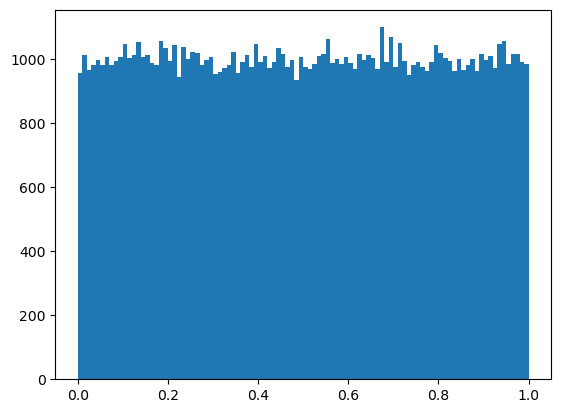

In [5]:
plt.hist(xs, bins=100)
plt.plot()

### (d) Screen Pixel Test

[]

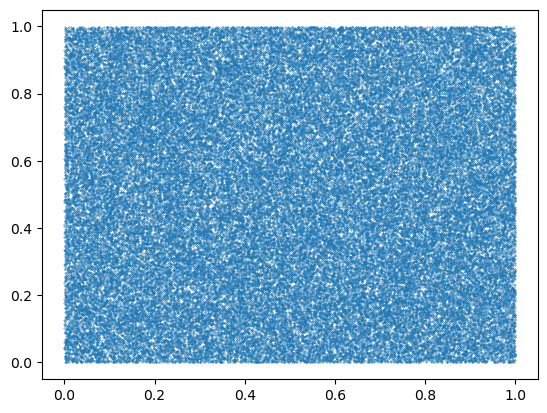

In [6]:
xs = [random.random() for _ in range(100000)]
ys = [random.random() for _ in range(100000)]

plt.scatter(xs, ys, 0.1)
plt.plot()

### (e) Program your own linear congruential random number generator

In [25]:
class MyPRNG:
    def __init__(self, seed = 0):
        self.seed = seed
        self.x_ = seed
    
    def random(self):
        a = 1664525
        b = 1013904223
        m = 2**32
        x = ((a * self.x_ + b) % m)
        self.x_ = x
        return x / 2**32

[]

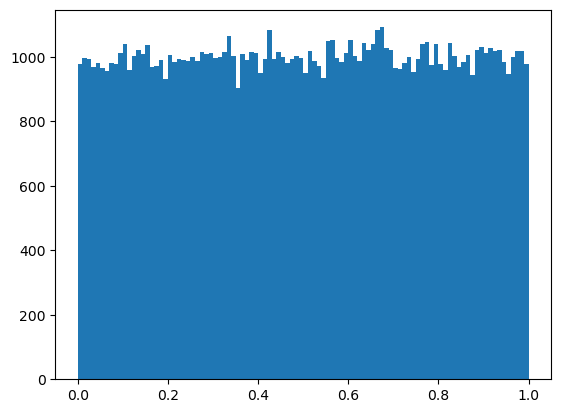

In [26]:
prng = MyPRNG()
xs = [prng.random() for i in range(100000)]
plt.hist(xs, bins=100)
plt.plot()

## Exercise 2: Your first Monte Carlo Simulation

In [33]:
n = 1000000

hit = 0
for i in range(n):
    x, y = random.random(), random.random()
    hit += 1 if (x*x + y*y < 1) else 0
pi = 4 * hit / n
pi

3.141644

## Exercise 3: Metropolis Criterion

(a)

The Metropolis Criterion states $w_{ij} = min(1, \frac{P_j}{P_i})$. With the Boltzmann Distribution $P_i$ this results in $w_{ij} = min(1, e^{-\beta \Delta E})$.

$\Delta E_{ij} < 0$ results in $w_{ij} = min(1, e^{-\beta \Delta E}) = e^{-\beta \Delta E}$. Additionally $\Delta E_{ij} = - \Delta E_{ji}$ leads to $w_{ji} = min(1, e^{-\beta \Delta E_{ji}}) = 1$ and thus: 
\begin{equation} 
    \frac{\omega_{ij}}{\omega_{ji}} = \frac{e^{-\beta \Delta E_{ij}}}{1} = e^{-\beta \Delta E_{ij}}
\end{equation}
resulting in ***detailed balance***.

$\Delta E > 0$ results in $w_{ij} = min(1, e^{-\beta \Delta E_{ij}}) = 1$ and $w_{ji} = min(1, e^{-\beta \Delta E_{ji}}) = e^{-\beta \Delta E_{ji}}$ thus: 
\begin{equation} 
    \frac{\omega_{ij}}{\omega_{ji}} = \frac{1}{e^{-\beta \Delta E_{ji}}} = e^{-\beta \Delta E_{ij}}
\end{equation}
resulting in ***detailed balance***.
<div style="text-align: right">$\square$</div>

(b) 
\begin{equation}
    \text{With } \Delta E_{ij} = - \Delta E_{ji} \text{ and }\\
    \omega_{ij} = \frac{e^{-\beta \Delta E_{ij}}}{e^{-\beta \Delta E_{ij}} + 1} = \frac{1}{e^{\beta \Delta E_{ij}} + 1} \text{ then: }\\
\frac{\omega_{ij}}{\omega_{ji}} = \frac{e^{-\beta \Delta E_{ij}} + 1}{e^{\beta \Delta E_{ij}} + 1} = e^{-\beta \Delta E_{ij}}
\end{equation}
<div style="text-align: right">$\square$</div>

(c)

Let the energy difference with be the pair potential $\Delta E_{ij} = V_{ij} = V(\mathbf{r}_i, \mathbf{r}_j)$. 

For the Metropolis Criterion we then get: 
\begin{equation}
    w_{ij} = min(1, e^{-\beta \Delta E}) = min(1, e^{-\beta V_{ij}}) = 
    \begin{cases}
        &1, &\|\mathbf{r}_{ij}\| \geq \sigma \\
        &0, &\|\mathbf{r}_{ij}\| < \sigma
    \end{cases}
\end{equation}

Heat bath:
\begin{equation}
    w_{ij} = min(1, e^{-\beta \Delta E}) = \frac{e^{-\beta V_{ij}}}{e^{-\beta V_{ij}} + 1} = 
    \begin{cases}
        &0.5, &\|\mathbf{r}_{ij}\| \geq \sigma \\
        &0, &\|\mathbf{r}_{ij}\| < \sigma
    \end{cases}
\end{equation}

## Exercise 4: Ising model

(a) At low temperatures stable areas form. With the increase of temperature these areas diffuse into noise. This phase transition occurs at approximately $T = 2.5$. For the phase transition the Wolff Algorithm seems appropriate due to critical slowing down while Metropolis is better outside of this "transition zone".

(b)

1. select random cell $c$
2. calculate energy $E_i = H_i = -J \sum_{j,k \in \mathcal{N}} s_j s_k$
3. flip spin of cell $c$ and calculate $E_j$
4. calculate energy difference $\Delta E = H_i - H_j$
5. accept flip with $w_ij = min(1, e^{-\beta \Delta E})$ otherwise reject and flip to original spin
6. goto 1.
